# News Classification
Author: [Reza Omidvar](https://github.com/ahmadrezaomidvar)

## Explanatory Data Analysis

# Importing Libraries

In [1]:
# Regular Packages
import logging
import re

# Data Science Packages
import pandas as pd
import numpy as np

# Visualization Packages
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# ML Packages
from sklearn.preprocessing import LabelEncoder
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer


# downloadd nltk packages
nltk.download("stopwords")
nltk.download("punkt")
nltk.download("wordnet")

# Set up logging and seed
seed = 1221
np.random.seed(seed)
logging.basicConfig(level=logging.INFO)
logger = logging.getLogger(__name__)

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/rezachi/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/rezachi/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/rezachi/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


### Data Loading & Preprocessing

In [2]:
df = df = pd.read_csv("../data/data.csv")

In [3]:
logger.info(f"Shape of the data: {df.shape}\n")
logger.info(f"Columns of the data: {df.columns}\n")
logger.info(f"Missing values in the data: \n{df.isnull().sum()}")

INFO:__main__:Shape of the data: (2318, 3)

INFO:__main__:Columns of the data: Index(['headline', 'article', 'category'], dtype='object')

INFO:__main__:Missing values in the data: 
headline    125
article     121
category    125
dtype: int64


In [4]:
# Deal with missing values
df.dropna(inplace=True)
logger.info(f"Shape of the data after dropping missing values: {df.shape}\n")

INFO:__main__:Shape of the data after dropping missing values: (1969, 3)



In [5]:
# Label encoding
le = LabelEncoder()
df["categoryId"] = le.fit_transform(df["category"])

# View the categories
df[["category", "categoryId"]].drop_duplicates().sort_values("categoryId").reset_index(
    drop=True
)

,category,categoryId
0,automobile,0
1,entertainment,1
2,politics,2
3,science,3
4,sports,4
5,technology,5
6,world,6


In [6]:
# Function to preprocess the text data
def preprocess_text(text: str) -> str:
    """
    Function to preprocess the text data

    Parameters
    ----------
    text : str
        Text data to be preprocessed

    Returns
    -------
    str
        Preprocessed text data
    """
    # Remove special characters and convert text to lowercase
    text = re.sub(r"\W+", " ", text.lower())

    # Tokenize the text
    tokens = word_tokenize(text)

    # Remove stopwords
    stop_words = set(stopwords.words("english"))
    # # add 'said' to the stopwords
    # stop_words.add('said')
    filtered_tokens = [token for token in tokens if token not in stop_words]

    # Lemmatize the text
    lemmatizer = WordNetLemmatizer()
    filtered_tokens = [lemmatizer.lemmatize(token) for token in filtered_tokens]

    # remove numbers
    filtered_tokens = [token for token in filtered_tokens if not token.isnumeric()]

    return " ".join(filtered_tokens)

In [7]:
# Apply the preprocessing function to the 'headline' and 'article' columns
df["headline"] = df["headline"].apply(preprocess_text)
df["article"] = df["article"].apply(preprocess_text)

In [8]:
# calculate the length of the headline and article
df["headline_length"] = df["headline"].apply(lambda x: len(x.split()))
df["article_length"] = df["article"].apply(lambda x: len(x.split()))

logger.info(f'Headline length: \n{df["headline_length"].describe()}\n')
logger.info(f'Article length: \n{df["article_length"].describe()}')

INFO:__main__:Headline length: 
count    1969.000000
mean        8.236668
std         1.498935
min         3.000000
25%         7.000000
50%         8.000000
75%         9.000000
max        14.000000
Name: headline_length, dtype: float64

INFO:__main__:Article length: 
count    1969.000000
mean       35.754698
std         3.651381
min        23.000000
25%        33.000000
50%        36.000000
75%        38.000000
max        47.000000
Name: article_length, dtype: float64


### Data Visualisation

INFO:__main__:Number of categories: 7
INFO:__main__:Categories: ['politics' 'entertainment' 'world' 'automobile' 'sports' 'science'
 'technology']


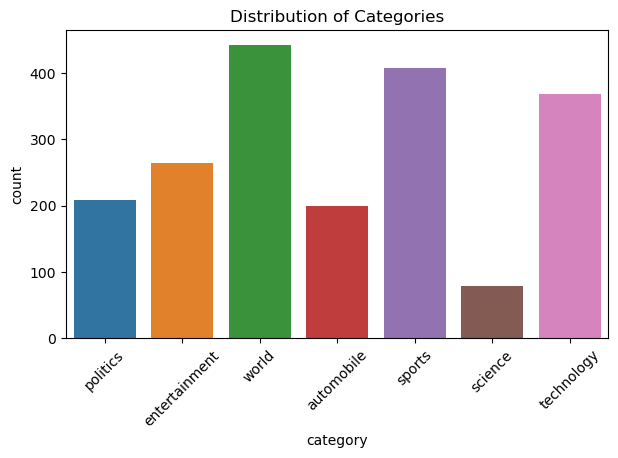

In [72]:
# Distribution of the categories
logger.info(f'Number of categories: {df["category"].nunique()}')
logger.info(f'Categories: {df["category"].unique()}')

plt.figure(figsize=(7, 4))
sns.countplot(x="category", data=df)
plt.title("Distribution of Categories")
plt.xticks(rotation=45)
plt.show()

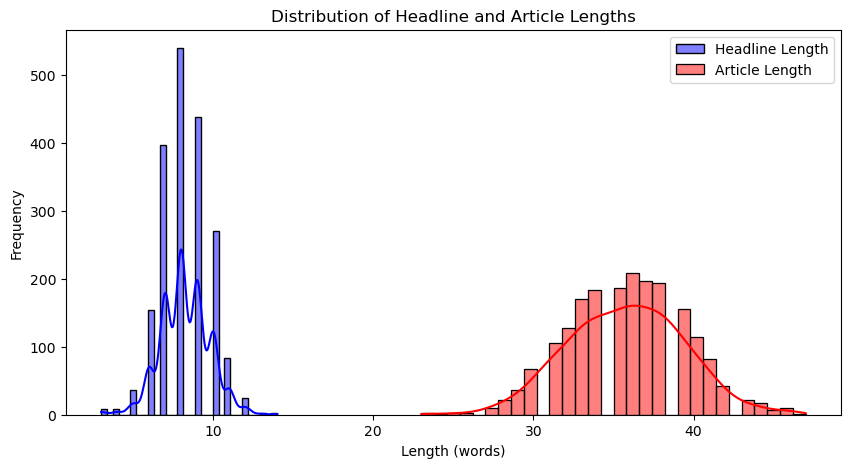

In [73]:
# Distribution of headline and article lengths
plt.figure(figsize=(10, 5))
sns.histplot(
    df["headline_length"], kde=True, bins=30, color="blue", label="Headline Length"
)
sns.histplot(
    df["article_length"], kde=True, bins=30, color="red", label="Article Length"
)
plt.title("Distribution of Headline and Article Lengths")
plt.xlabel("Length (words)")
plt.ylabel("Frequency")
plt.legend()
plt.show()

### Clean Data Preparation

In [10]:
""" 
Going with the intuition that the headline is often more descriptive of the category of the news, 
as well as to provide more text data to the model, we will combine the headline and article columns
"""
df["text"] = df["headline"] + " " + df["article"]

In [75]:
clean_df = df[["text", "category", "categoryId"]]
clean_df.head()

,text,category,categoryId
0,kerala cm claim victory local body poll say bj...,politics,2
1,new coolie journey varun dhawan asked aspect o...,entertainment,1
2,germany extends partial lockdown jan combat co...,world,6
3,chadwick black panther character recast sequel...,entertainment,1
4,temple donation drive akin poll campaigning lo...,politics,2


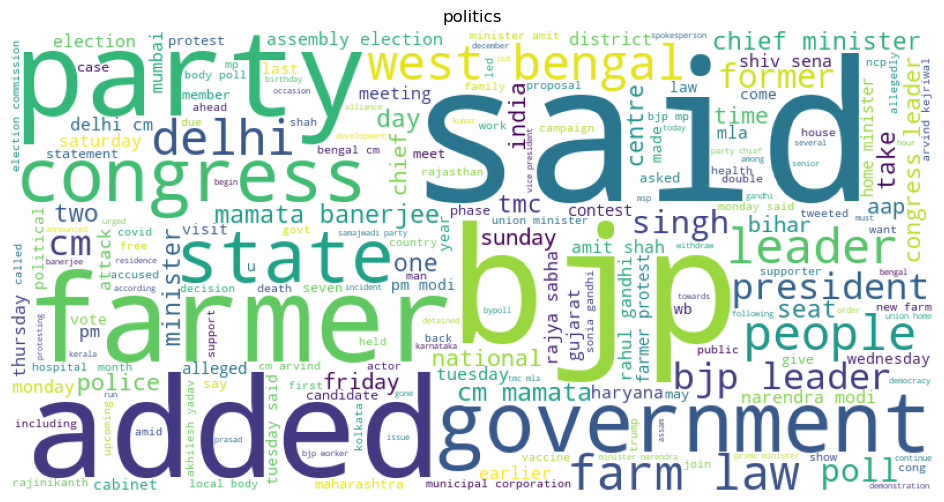

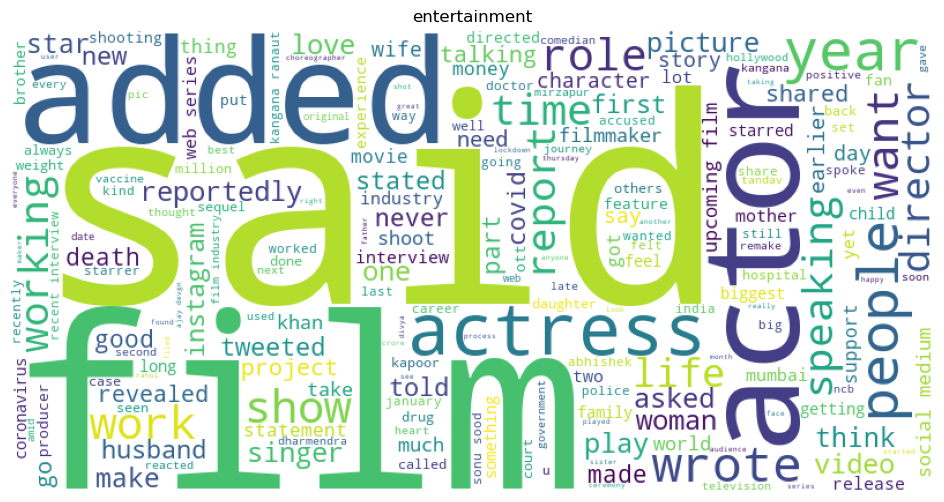

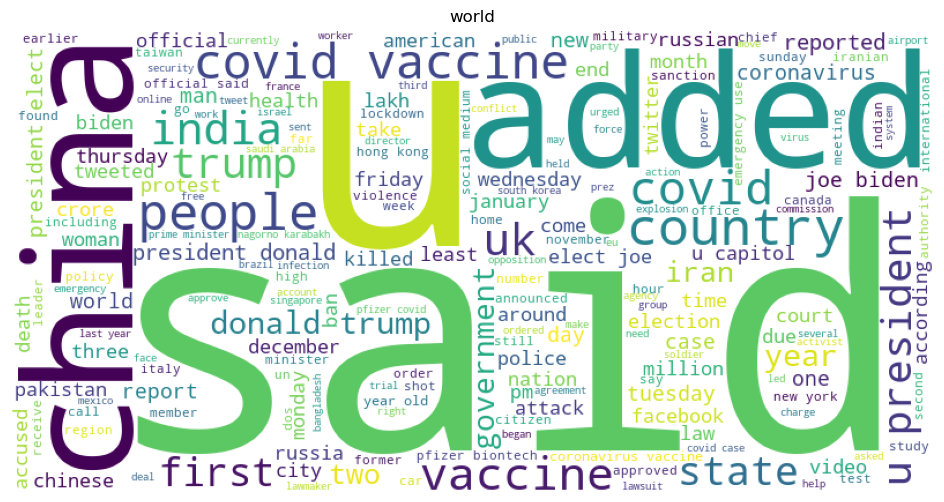

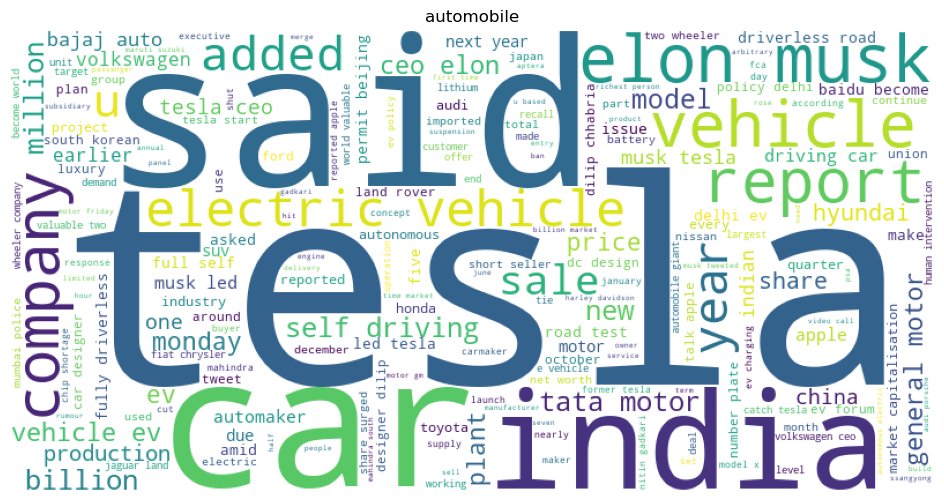

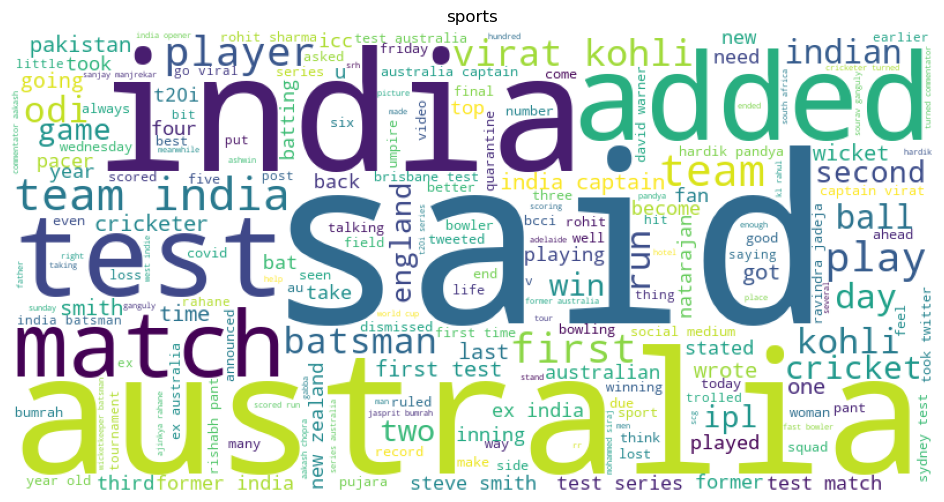

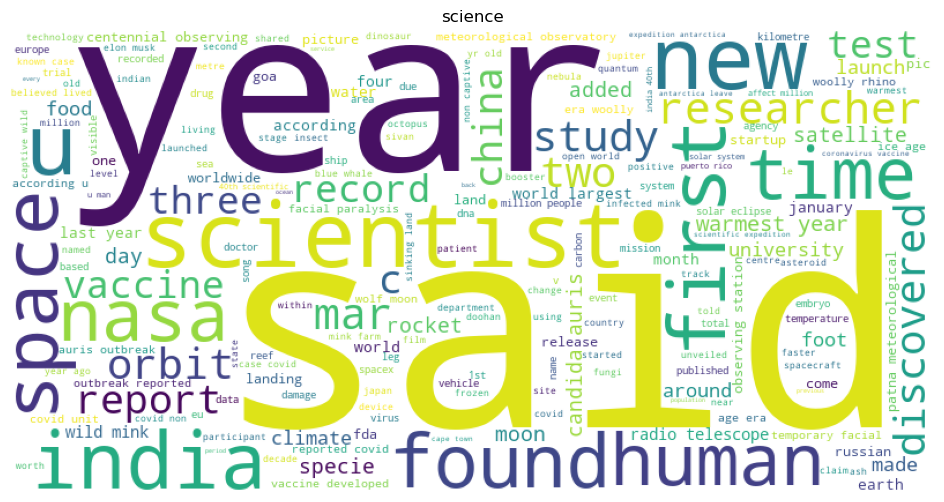

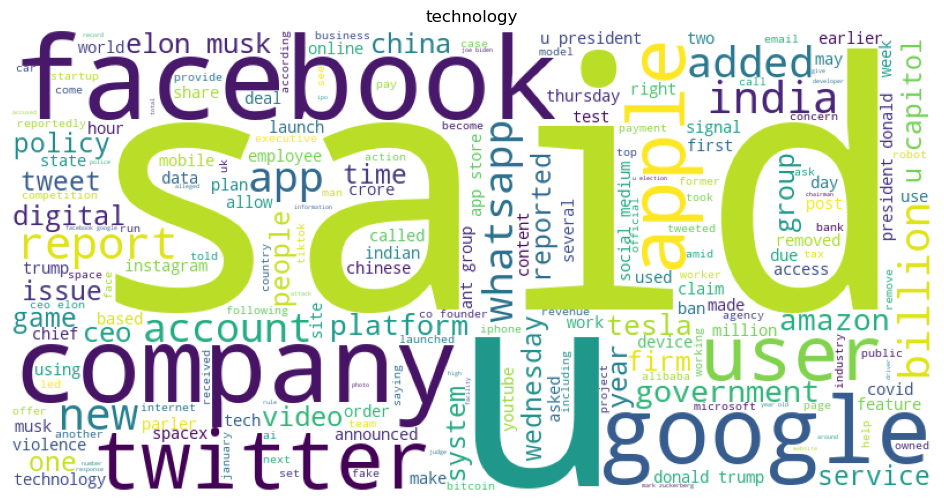

In [76]:
# Created a wordcloud for each category
categories = clean_df["category"].unique()
for category in categories:
    text = " ".join(clean_df[clean_df["category"] == category]["text"])
    wordcloud = WordCloud(background_color="white", width=800, height=400).generate(
        text
    )
    plt.figure(figsize=(12, 6))
    plt.imshow(wordcloud)
    plt.title(category)
    plt.axis("off")
    plt.show()

In [77]:
# Save the cleaned data
clean_df.to_csv("../data/clean_data.csv", index=False)